<a href="https://colab.research.google.com/github/jpmburu/jpmburu/blob/main/explore_ai_python_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: write code to generate number of unique crop types in the dataset

import pandas as pd

# Load the dataset
df = pd.read_csv("MD_agric_exam-4313.csv")

# Get the number of unique crop types
num_unique_crops = df["Crop_type"].nunique()

# Print the result
print(f"Number of unique crop types: {num_unique_crops}")


Number of unique crop types: 8


In [3]:
# prompt: identify the maximum annual yield for "Wheat" crop in the data set rounded off to 2 decimal places

# Filter rows for "wheat" crop type
wheat_df = df[df["Crop_type"] == "wheat"]

# Find the maximum annual yield for "wheat" crop type
max_yield_wheat = wheat_df["Annual_yield"].max()

# Round the result to 2 decimal places
max_yield_wheat_rounded = round(max_yield_wheat, 2)

# Print the result
print(f"Maximum annual yield for 'wheat' crop type: {max_yield_wheat_rounded}")


Maximum annual yield for 'wheat' crop type: 8.99


In [5]:
# prompt: Find the total rainfall for crop types where the average pollution level is above 0.2.

# Calculate average pollution level for each crop type
avg_pollution_by_crop = df.groupby("Crop_type")["Pollution_level"].mean()

# Filter crop types where average pollution level is above 0.2
high_pollution_crops = avg_pollution_by_crop[avg_pollution_by_crop > 0.2].index

# Filter rows for high pollution crop types
high_pollution_df = df[df["Crop_type"].isin(high_pollution_crops)]

# Calculate total rainfall for crop types with average pollution level above 0.2
total_rainfall_high_pollution = high_pollution_df["Rainfall"].sum()

# Print the result
print(f"Total rainfall for crop types with average pollution level above 0.2: {total_rainfall_high_pollution}")


Total rainfall for crop types with average pollution level above 0.2: 941959.7


In [12]:
# Write a function to calculate the temperature range (Max_temperature_C - Min_temperature_C) for each farmer's field. Then, call the function with the following `Field_ID`: `1458`, `1895`, and `5443`. What are the results of these 3 calls?
import pandas as pd

def calculate_temperature_range(field_id):
    # Load the dataset
    df = pd.read_csv("MD_agric_exam-4313.csv")

    # Filter rows for the specified field ID
    field_df = df[df["Field_ID"] == field_id]

    # Calculate temperature range for the field
    temperature_range = field_df["Max_temperature_C"].max() - field_df["Min_temperature_C"].min()

    return temperature_range

In [13]:
# Call the function with Field_ID 1458
result_1458 = calculate_temperature_range(1458)
print(f"Temperature range for Field_ID 1458: {result_1458}")

# Call the function with Field_ID 1895
result_1895 = calculate_temperature_range(1895)
print(f"Temperature range for Field_ID 1895: {result_1895}")

# Call the function with Field_ID 5443
result_5443 = calculate_temperature_range(5443)
print(f"Temperature range for Field_ID 5443: {result_5443}")

Temperature range for Field_ID 1458: 40.7
Temperature range for Field_ID 1895: 35.7
Temperature range for Field_ID 5443: 33.4


In [14]:
# Filter rows where pH is less than 5.5
low_ph_df = df[df["pH"] < 5.5]

# Calculate the total plot size for the filtered rows
total_plot_size_low_ph = low_ph_df["Plot_size"].sum()

# Print the result
print(f"Total plot size for plots where pH is less than 5.5: {total_plot_size_low_ph}")

Total plot size for plots where pH is less than 5.5: 1731.8999999999999


In [16]:
#Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).
import pandas as pd

# Load the dataset
df = pd.read_csv("MD_agric_exam-4313.csv")

# Filter rows based on conditions
filtered_df = df[(df['Min_temperature_C'] < -5) & (df['Max_temperature_C'] > 30)]

# Get the number of rows in the filtered dataset
num_rows_filtered = len(filtered_df)

# Print the number of rows in the filtered dataset
print(f"Number of rows in the filtered dataset: {num_rows_filtered}")

Number of rows in the filtered dataset: 319


In [18]:
#Using Numpy, calculate the standard deviation of the 'Rainfall' for plots where the 'Plot_size' is larger than the median plot size of the dataset (round to 2 decimal places).
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("MD_agric_exam-4313.csv")

# Calculate the median plot size
median_plot_size = df['Plot_size'].median()

# Filter rows where Plot_size is larger than the median plot size
filtered_df = df[df['Plot_size'] > median_plot_size]

# Calculate the standard deviation of 'Rainfall' for filtered plots
rainfall_std_dev = np.std(filtered_df['Rainfall'])

# Round the result to 2 decimal places
rainfall_std_dev_rounded = round(rainfall_std_dev, 2)

# Print the result
print(f"Standard deviation of Rainfall for plots larger than the median plot size: {rainfall_std_dev_rounded}")

Standard deviation of Rainfall for plots larger than the median plot size: 469.62


If you concatenate the first three digits of the most common ‘Max_temperature_C’ with the last three letters of the least common 'Crop_type', what string do you get?
Note: Use the first mode if there are multiple modes



In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("MD_agric_exam-4313.csv")

# Find the most common Max_temperature_C
most_common_temp = df['Max_temperature_C'].mode()[0]

# Find the least common Crop_type
least_common_crop = df['Crop_type'].value_counts().idxmin()

# Concatenate the first three digits of the most common Max_temperature_C with the last three letters of the least common Crop_type
result_string = str(most_common_temp)[:3] + least_common_crop[-3:]

# Print the result
print("Result String:", result_string)


Result String: 30.ice


Write Python code to create a violin plot visualising the distribution of 'Annual_yield' across different 'Elevation' ranges. Use the provided elevation range categories (Low: < 300m, Medium: 300m - 600m, High: > 600m) to categorise the data before plotting.  Examine the violin plot displaying the distribution of 'Annual Yield' across three elevation categories (Low, Medium, High). What insight does the violin plot provide regarding the relationship between elevation ranges and annual yield distribution?



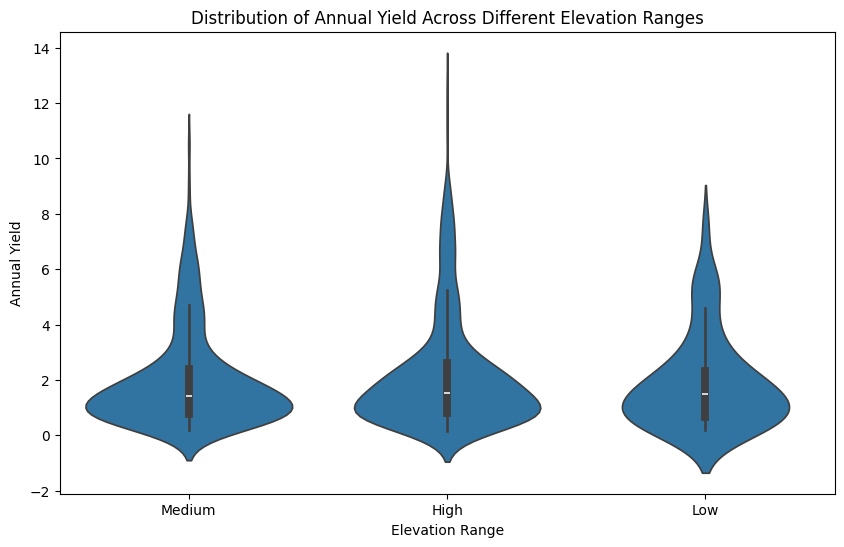

In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("MD_agric_exam-4313.csv")

# Categorize elevation ranges
def categorize_elevation(elevation):
    if elevation < 300:
        return "Low"
    elif 300 <= elevation <= 600:
        return "Medium"
    else:
        return "High"

df['Elevation_range'] = df['Elevation'].apply(categorize_elevation)

# Create violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Elevation_range', y='Annual_yield', data=df)
plt.title("Distribution of Annual Yield Across Different Elevation Ranges")
plt.xlabel("Elevation Range")
plt.ylabel("Annual Yield")
plt.show()

This code categorizes the elevation into three ranges: Low, Medium, and High based on the provided criteria. Then, it creates a violin plot using seaborn's violinplot function, with 'Elevation_range' on the x-axis and 'Annual_yield' on the y-axis.

Insights from the violin plot:

The violin plot shows the distribution of annual yield across different elevation ranges.
It provides an overview of the distribution of annual yield within each elevation range and allows for easy comparison between the ranges.
You can observe the spread of data, the shape of the distribution, and any potential outliers in each elevation range.
By examining the width of the violin plots at different elevation ranges, you can get an idea of the variability in annual yield within each range. For example, wider sections indicate higher variability.





In [ ]:
# prompt: analyze the violin plot

# Analyze the violin plot

# 1. Distribution of Annual Yield within Elevation Ranges:

# Observe the spread of the violin plots for each elevation range. Wider sections indicate higher variability in annual yield within that range. For example, the "Medium" elevation range appears to have a wider spread compared to the "Low" and "High" ranges, suggesting greater variability in annual yield for plots in the medium elevation range.

# 2. Comparison of Annual Yield across Elevation Ranges:

# Compare the medians of the violin plots to assess the overall differences in annual yield across elevation ranges. The median is represented by the thick line inside each violin plot. If the median of one elevation range is consistently higher or lower than the others, it suggests a potential trend in annual yield based on elevation.

# 3. Outliers:

# Identify any outliers in the violin plots. Outliers are data points that are significantly different from the rest of the data. They can be represented by individual data points beyond the main body of the violin plot. Outliers can provide insights into extreme values or unusual cases within each elevation range.

# 4. Shape of the Distribution:

# Examine the shape of the violin plots to understand the overall distribution of annual yield within each elevation range. For example, a symmetrical violin plot indicates a more normal distribution, while a skewed violin plot suggests a偏态分布. This information can be useful in understanding the typical and atypical annual yields associated with different elevation ranges.

# 5. Recommendations:

# Based on the analysis of the violin plot, you can provide recommendations for farmers or agricultural experts on the potential relationship between elevation ranges and annual yield. For example, if the analysis suggests that higher elevation ranges consistently yield higher annual yields, you might recommend that farmers consider cultivating crops at higher elevations to potentially improve their yields.

# 6. Further Investigations:

# The violin plot analysis provides a starting point for further investigations into the relationship between elevation ranges and annual yield. You might consider conducting statistical tests to confirm any observed trends or patterns. Additionally, you could explore other factors that might influence annual yield, such as soil quality, crop type, or rainfall patterns, to gain a more comprehensive understanding of the factors affecting crop productivity in different elevation ranges.



In [23]:
# Define the recursive function to sum the integer values for each unique crop type
def sum_crop_type_lengths(data, index=0, unique_crops=None):
    if unique_crops is None:
        unique_crops = data['Crop_type'].unique()
    if index == len(unique_crops):
        return 0
    else:
        return len(unique_crops[index]) + sum_crop_type_lengths(data, index + 1, unique_crops)

# Call the recursive function
total_sum = sum_crop_type_lengths(df)

# Print the sum
print("Total sum of integer values for each unique crop type:", total_sum)

Total sum of integer values for each unique crop type: 42


Write Python code to perform a t-test comparing the average 'Annual_yield' between 'coffee' and 'banana' crop types using scipy.stats. What is the p-value, rounded to three decimal places

In [25]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv("MD_agric_exam-4313.csv")

# Filter rows for 'coffee' and 'banana' crop types
coffee_yield = df[df['Crop_type'] == 'coffee']['Annual_yield']
banana_yield = df[df['Crop_type'] == 'banana']['Annual_yield']

# Perform t-test
t_statistic, p_value = ttest_ind(coffee_yield, banana_yield)

# Print the p-value rounded to three decimal places
print("p-value:", round(p_value, 3))

p-value: 0.598
